In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_data.csv')
df

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520


# Data Exploration

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [77]:
df.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [78]:
df['country'].nunique()

239

In [79]:
df.duplicated().count()

1000

In [80]:
df.isna().count()

name                  1000
age                   1000
gender                1000
education             1000
income                1000
country               1000
purchase_frequency    1000
spending              1000
dtype: int64

In [81]:
df['spending'].max()

25546.5

In [82]:
df['spending'].min()

611.985

In [83]:
df['gender'].value_counts()

Male      501
Female    499
Name: gender, dtype: int64

In [84]:
df['country'].value_counts().head(5)

Congo       12
Palau       11
Slovenia    10
Algeria      9
Ukraine      9
Name: country, dtype: int64

In [85]:
df.education.value_counts()

Bachelor       271
PhD            248
High School    245
Master         236
Name: education, dtype: int64

<AxesSubplot: xlabel='education', ylabel='count'>

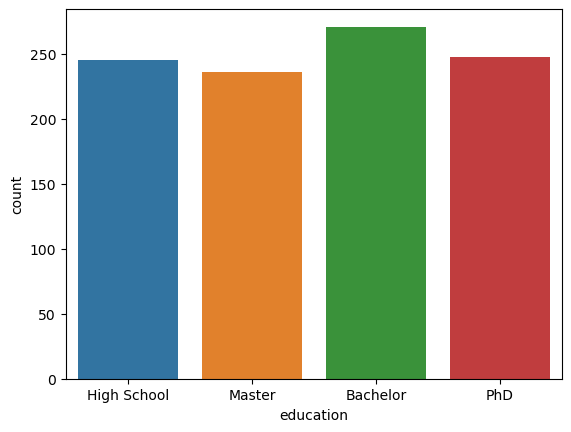

In [86]:
sns.countplot(x=df['education'], data=df)

In [87]:
#Drop column name since we can't allow strings in regression model
df.drop(columns='name', inplace=True)

In [88]:
#Drop additional columns
df.drop(columns='country', inplace=True)

<AxesSubplot: xlabel='gender', ylabel='count'>

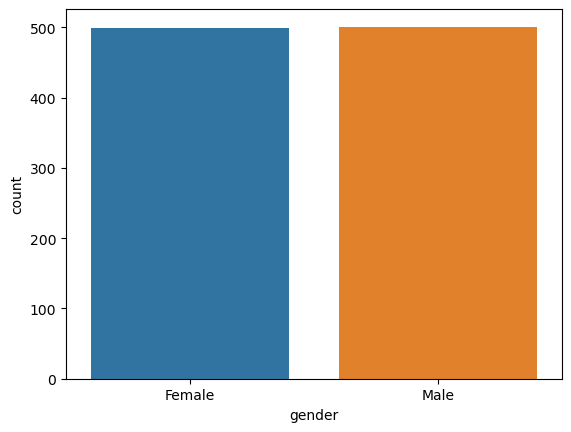

In [90]:
sns.countplot(x=df['gender'], data=df)

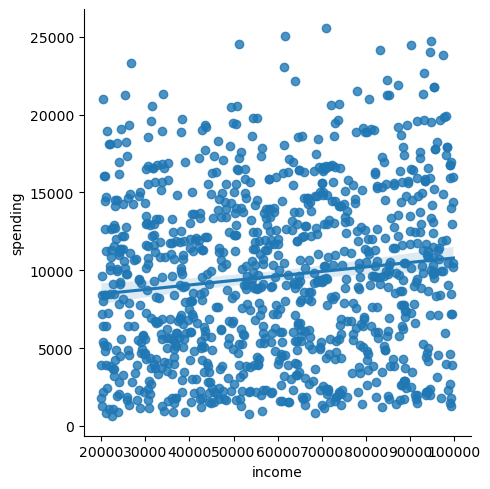

In [91]:
sns.lmplot(x='income', y='spending', data=df)

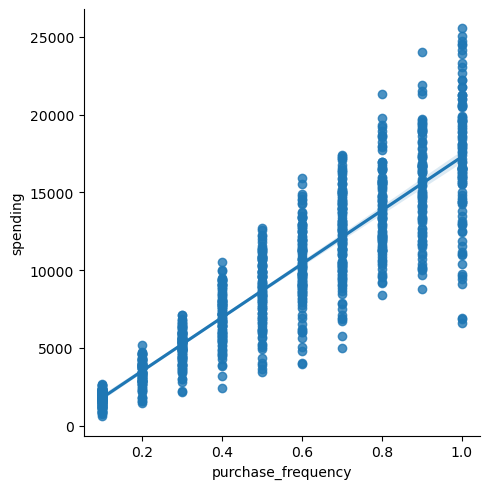

In [92]:
sns.lmplot(x='purchase_frequency', y='spending', data=df)

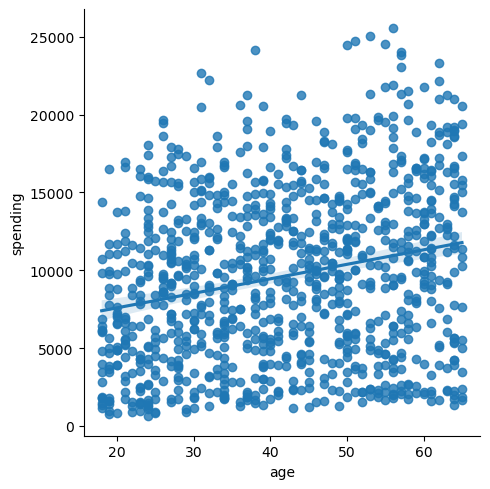

In [93]:
sns.lmplot(x='age', y='spending', data=df)

In [94]:
#Check correlation between variables and independent variable
df.corr()

/var/folders/rb/0gt4r16106z3q6h2ky_t2d900000gn/T/ipykernel_64306/1918572663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,income,purchase_frequency,spending
age,1.000000,-0.047190,0.021751,0.234201
income,-0.047190,1.000000,0.028187,0.122851
purchase_frequency,0.021751,0.028187,1.000000,0.895161
spending,0.234201,0.122851,0.895161,1.000000


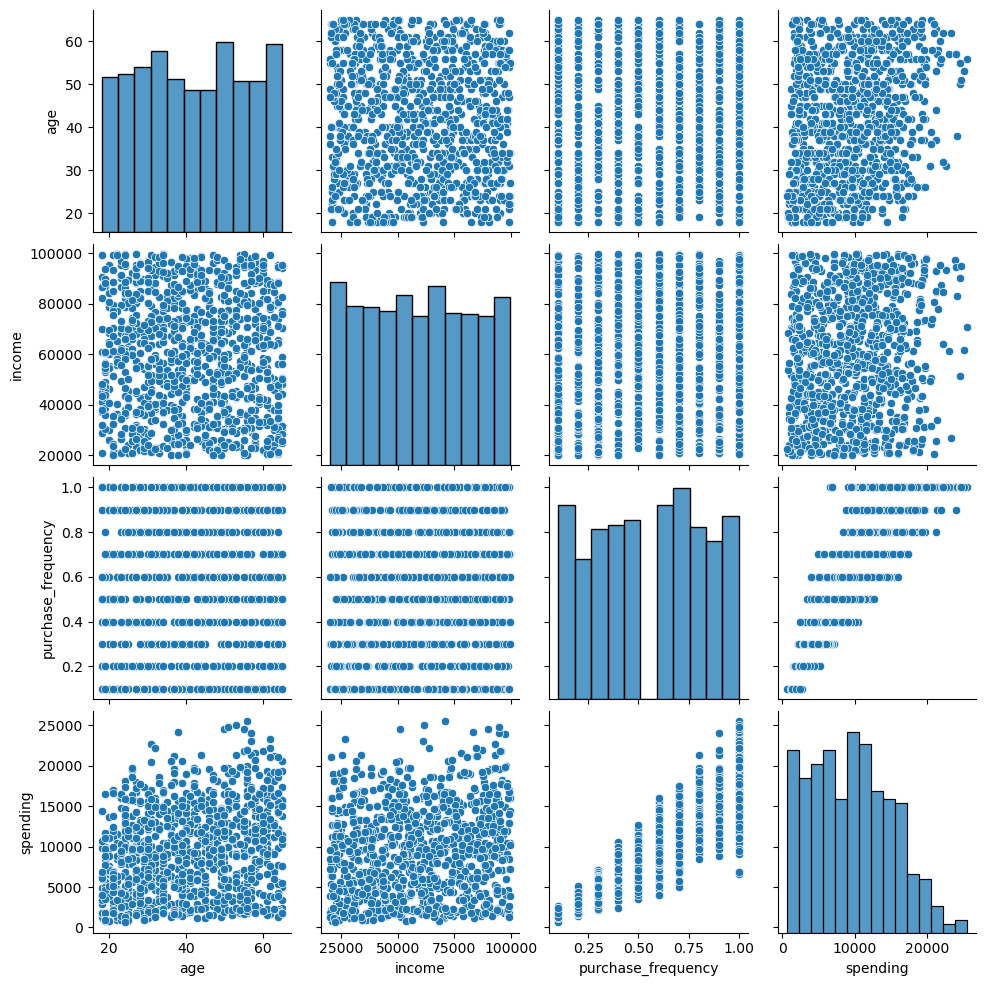

In [95]:
sns.pairplot(df)

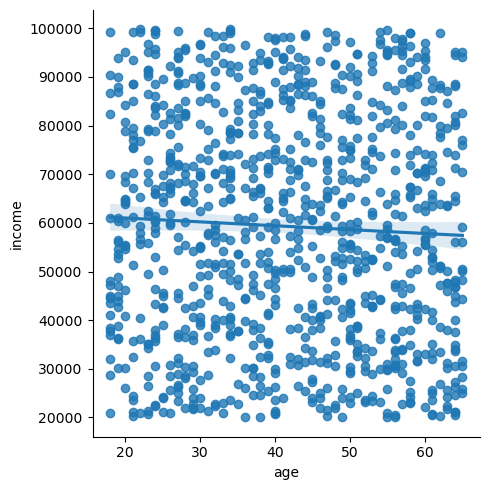

In [96]:
sns.lmplot(x='age', y='income', data=df)

In [97]:
#Reading number of unique entities in each column
for i in df.columns:
    print(i, ":", len(df[i].unique()))

age : 48
gender : 2
education : 4
income : 997
purchase_frequency : 10
spending : 1000


/var/folders/rb/0gt4r16106z3q6h2ky_t2d900000gn/T/ipykernel_64306/2580415248.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)


<AxesSubplot: >

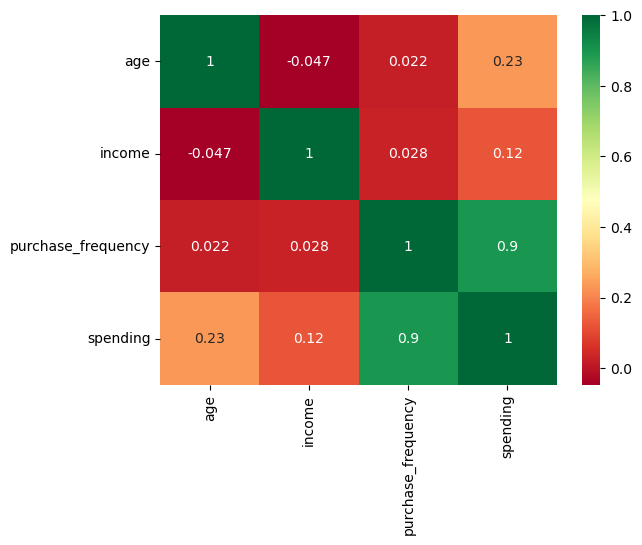

In [98]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)

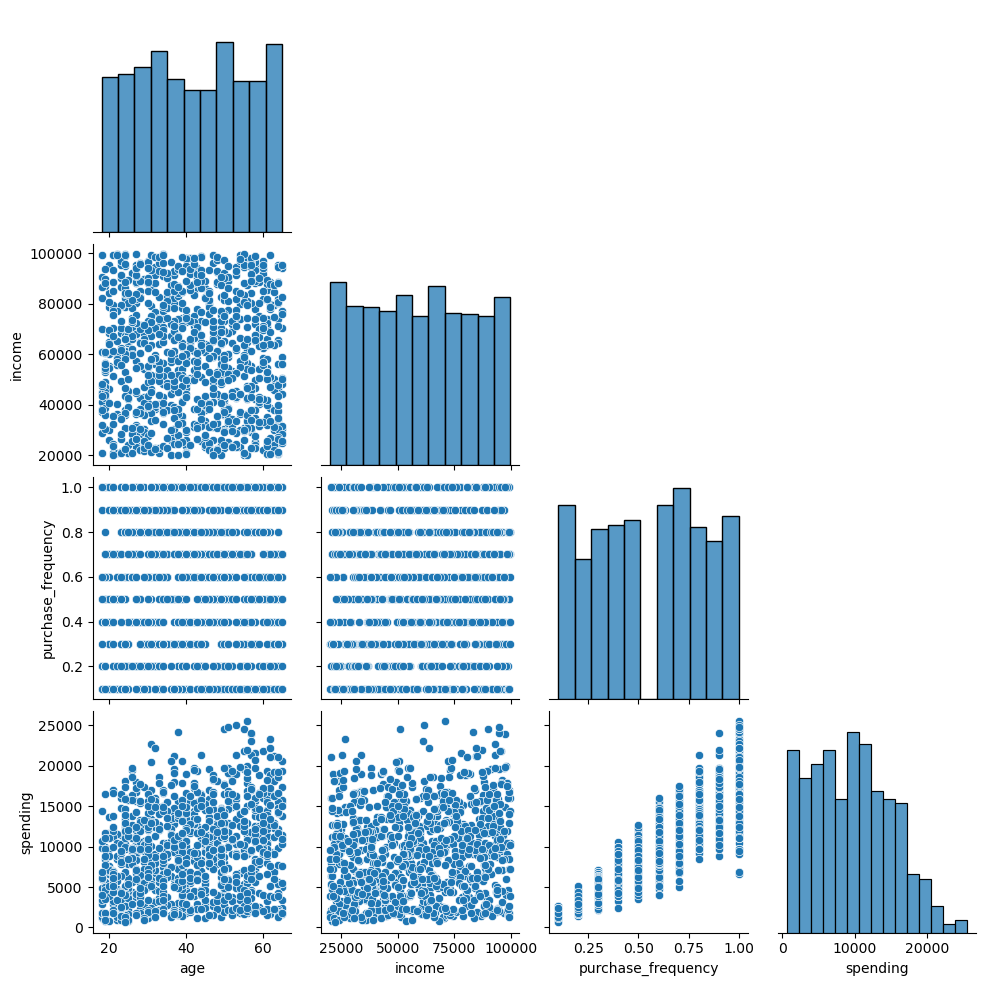

In [99]:
sns.pairplot(df, corner=True)
plt.show()

<AxesSubplot: xlabel='gender', ylabel='spending'>

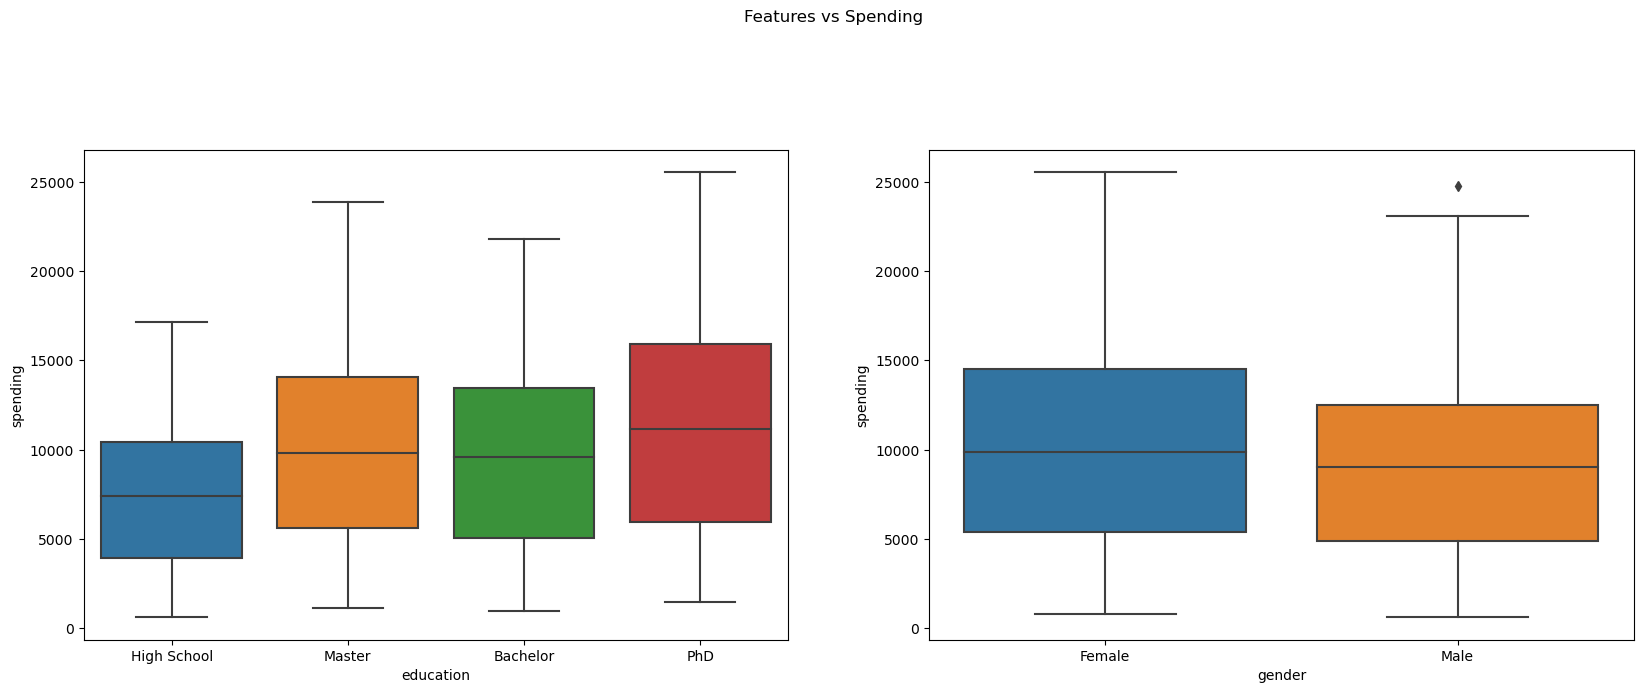

In [100]:
plt.figure(figsize=(20,14))
plt.suptitle('Features vs Spending')
plt.subplot(2,2,1)
sns.boxplot(x='education', y='spending', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='gender', y='spending', data=df)

# Model Building

In [101]:
#Create x and y train and test dataset
X = df['income'].values.reshape(-1,1)
Y = df['spending'].values.reshape(-1,1)
print(X.shape, Y.shape)

(1000, 1) (1000, 1)


In [102]:
#Creation of train test split with 80% of train data and 20% of test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print('train percentage', len(X)*0.80,'test percentage',len(X)*0.20)

(800, 1) (800, 1)
train percentage 800.0 test percentage 200.0


In [103]:
#Create a linear regression model since we want to predict spending
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [104]:
pred = lm.predict(X_test)
pred

array([[ 8671.30655023],
       [10139.16895542],
       [10362.81617468],
       [10815.1984704 ],
       [10367.21732722],
       [ 9758.39122648],
       [10346.33526306],
       [ 9329.41931659],
       [ 9331.97885211],
       [10570.76282852],
       [ 9078.64726362],
       [ 9223.44830342],
       [ 9758.45365418],
       [ 9166.07725122],
       [ 8466.106715  ],
       [ 9704.67219447],
       [10207.74577896],
       [ 9413.13485631],
       [ 8914.33756896],
       [ 9741.31725175],
       [10530.24725411],
       [ 9848.63046038],
       [10063.28809149],
       [10645.64484931],
       [ 9226.03905278],
       [ 9107.92585282],
       [ 9722.4640877 ],
       [10762.47828151],
       [ 8514.61303443],
       [ 9100.02874934],
       [10687.1904807 ],
       [ 9389.88053972],
       [ 9863.39461038],
       [10760.04360139],
       [ 8896.20232341],
       [10379.51558324],
       [ 9366.28287081],
       [10479.46232379],
       [10481.21029927],
       [ 8958.03695584],


In [106]:
print(y_train.mean())
print(pred.mean())

9554.21586875
9614.151255595509


In [111]:
coef = lm.coef_[0]
coef
intercept = lm.intercept_
intercept

array([7715.91309772])

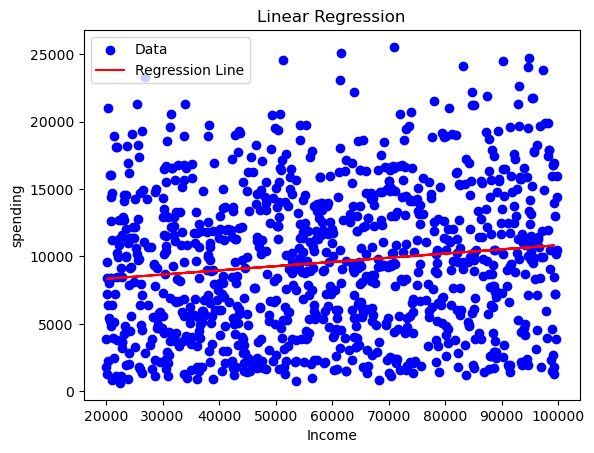

In [109]:
plt.scatter(X,Y,color='blue',label='Data')
plt.plot(X_test,pred,color='red',label='Regression Line')
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('Linear Regression')
plt.legend()